# COVID-19 Auswertung - Positivenquote

## import libraries

In [1]:
Programm_Name = "Testungen" # 04.01.2021 - Time Series Impffdaten erstellen

### Speicherorte und Dateinamen Plots

In [2]:
Laufwerk = "D:\\"
pfad_output = "Github\\Auswertung_Covid_19\\output\\"
pfad_onedrive = "OneDrive\\Auswertung_Covid_19\\"
pfad_input = "Github\\Auswertung_Covid_19\\input\\"

name_input = "Testzahlen-gesamt.xlsx"

name_6 = "plot_6_Positivenquote_ger.png" # Positivenquote
name_6_2 = "plot_6-2_Anzahl_Testungen_ger.png" # Anzahl Testungen


name_output_df_EW = 'Dataframes\\df_PQ.csv'

name_performance = 'Dataframes\\df_performance.csv'

In [3]:
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots
#import matplotlib as mpl
from matplotlib.ticker import FuncFormatter   # Numberformat plot ticks
#import numpy as np

# performance
from datetime import datetime
from datetime import date # todays date
import seaborn as sns

import os
now = datetime.now()

In [4]:
E_fr = 66_012_908
E_pl = 38_659_927
E_ger = 83_020_000
E_cz = 10_586_651
E_at = 8_902_600
E_ch = 8_847_020
E_gb = 66_650_000

E_isr = 8_884_000
E_usa = 328_200_000
E_rus = 144_500_000
E_ita = 60_360_000
E_spa = 46_940_000
E_se = 10_230_000

# Preprocessing Dataframes

In [5]:
today = date.today().strftime("%d.%m.%Y")

## Datenimport

In [6]:
# df_

In [7]:
# Datenimport Positivenquote
df_PQ = pd.read_excel(Laufwerk + pfad_input + name_input,
                    sheet_name ="1_Testzahlerfassung",
                    usecols="A:E",
                    skiprows="")

In [8]:
df_PQ

,Kalenderwoche,Anzahl Testungen,Positiv getestet,Positivenanteil (%),Anzahl übermittelnder Labore
0,"Bis einschließlich KW10, 2020",69493,1722,NaN,NaN
1,11/2020,129291,7502,5.802415,119.0
2,12/2020,374534,25886,6.911522,154.0
3,13/2020,377599,33139,8.776241,159.0
4,14/2020,417646,37649,9.014572,163.0
...,...,...,...,...,...
61,18/2021,1255723,128709,10.249792,212.0
62,19/2021,1100259,90312,8.208249,210.0
63,20/2021,1215641,70140,5.769796,207.0
64,21/2021,936414,38972,4.161834,202.0


## preprocessing

In [9]:
# preprocessing Positivenquote
df_PQ = df_PQ.drop(columns=['Anzahl übermittelnder Labore', 'Positivenanteil (%)'])
df_PQ = df_PQ.replace('\*','',regex=True)
df_PQ.drop(df_PQ.tail(1).index,inplace=True) # drop last n rows
df_PQ.drop(df_PQ.head(1).index,inplace=True) # drop first n rows
#df_PQ["Positiven-quote (%)"] = df_PQ["Positiven-quote (%)"].astype(str)+ " %"
df_PQ["Kalenderwoche"] = "KW "+df_PQ["Kalenderwoche"].astype(str)

df_PQ["Positivenquote"] = round(100*(df_PQ["Positiv getestet"]/df_PQ["Anzahl Testungen"]),1)
df_PQ

,Kalenderwoche,Anzahl Testungen,Positiv getestet,Positivenquote
1,KW 11/2020,129291,7502,5.8
2,KW 12/2020,374534,25886,6.9
3,KW 13/2020,377599,33139,8.8
4,KW 14/2020,417646,37649,9.0
5,KW 15/2020,386241,30829,8.0
...,...,...,...,...
60,KW 17/2021,1360960,152086,11.2
61,KW 18/2021,1255723,128709,10.2
62,KW 19/2021,1100259,90312,8.2
63,KW 20/2021,1215641,70140,5.8


### Linien und Schriftgrößen

In [10]:
# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 25

# output größe der bilder
h = 16*1.1
v = 9
dpi = 200

 ### Bezugsgröße Einwohner

In [11]:
pE = 100_000

## Länder Farben

In [12]:
c_fr = '#f80d0d'    # rot
c_pl = '#25e5e5'    # cyan
c_isr = '#25e5e5'
c_ger = '#0721ff'   # dunkelblau
c_cz = '#bb8fce'    # lila
c_usa = '#bb8fce'
c_at = '#18c213'    # grün
c_rus = '#18c213'
c_se = '#18c213'
c_ch = '#000000'    # schwarz
c_ita = '#000000'
c_gb = '#faac2b'    # orange

### Einwohnerzahlen

In [13]:
E_fr = 66_012_908
E_pl = 38_659_927
E_ger = 83_020_000
E_cz = 10_586_651
E_at = 8_902_600
E_ch = 8_847_020
E_gb = 66_650_000

E_isr = 8_884_000
E_usa = 328_200_000
E_rus = 144_500_000
E_ita = 60_360_000
E_spa = 46_940_000
E_se = 10_230_000

# Visualisierung der Plots

In [14]:
# ts = pd.to_datetime('2020-12-15', utc=True)
# #dataframe reduzieren 
# data = data.loc[data.Date_reported >= ts, :]
# ger = data[data.Country == 'Germany']

In [15]:
y = max(df_PQ["Positivenquote"])*0.96
print(f'y = {y}')

x=(1/2)*df_PQ["Kalenderwoche"].count()
print(f'x = {x}')


y = 14.783999999999999
x = 32.0


## RKI Positivenquote pro Woche

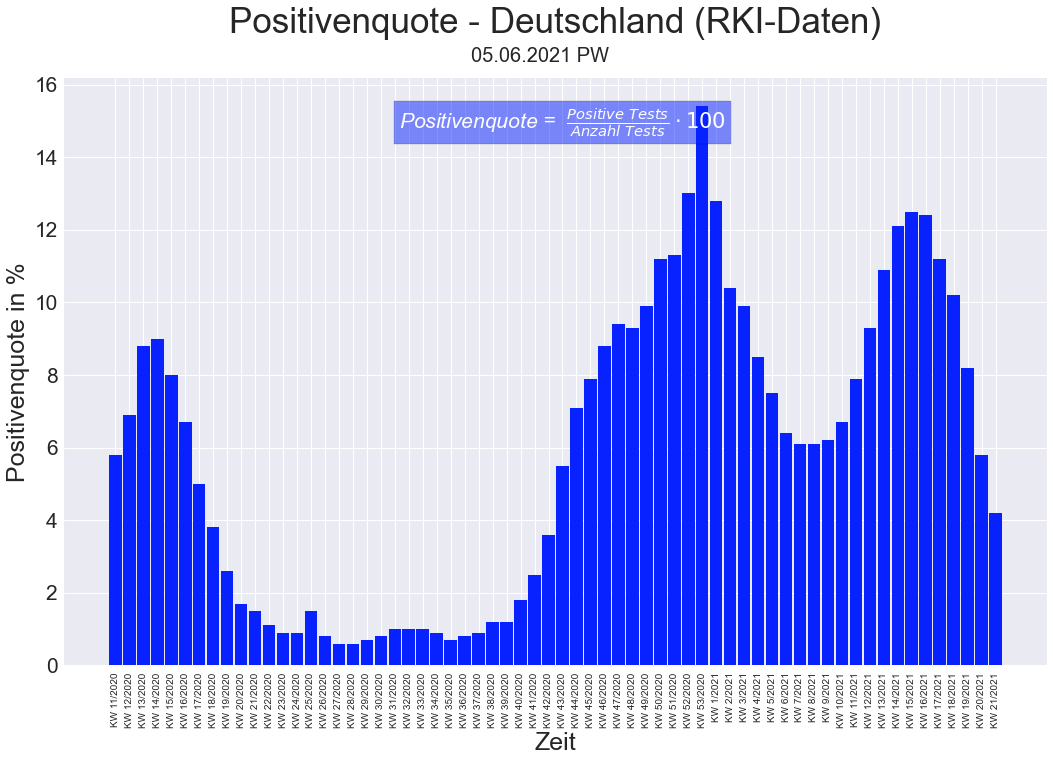

In [16]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(h,v*1.2))

plt.style.use('seaborn')

plt.bar(x=df_PQ["Kalenderwoche"], height=df_PQ["Positivenquote"], width = 0.9, align = 'center', color = c_ger)

# # Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 15, rotation=90)
plt.yticks(fontsize=size -4)

plt.ylabel('Positivenquote in %', fontsize=size)
plt.xlabel('Zeit', fontsize=size)

plt.title('Positivenquote - Deutschland (RKI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)


plt.text(x, y, r'Positivenquote =  $\frac{Positive\ Tests}{Anzahl\ Tests}\cdot100$', horizontalalignment='center', size=size-4, style='italic',color = "white",
        bbox={'facecolor': c_ger, 'alpha': 0.5, 'pad': 5})

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(Laufwerk + pfad_output + name_6, dpi = dpi, bbox_inches='tight')
plt.savefig(Laufwerk + pfad_onedrive + name_6, dpi = dpi, bbox_inches='tight')

plt.show()

## RKI Testungen pro Woche

In [17]:
#df_PQ.head(1)

In [18]:
def millions(x, pos):
   # 'The two args are the value and tick position'
    return '%1.1f Mio' % (x * 1e-6)
formatter = FuncFormatter(millions)


fig = plt.figure(figsize=(h,v))
ax = fig.add_subplot()
ax.yaxis.set_major_formatter(formatter)


ax = plt.bar(x=df_PQ["Kalenderwoche"], height=df_PQ["Anzahl Testungen"], width = 0.9, align = 'center', color = c_ger)

# # Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 15, rotation=90)
plt.yticks(fontsize=size -4)


plt.ylabel('Anzahl Testungen', fontsize=size+10)
plt.xlabel('Zeit', fontsize=size)

plt.title('Anzahl Testungen (RKI-Daten)\n', fontsize=size+10)
plt.suptitle(today + ' PW', fontsize=size-5, y=0.92)

#plt.figure(figsize=(16,9))

fig.savefig(Laufwerk + pfad_output + name_6_2, dpi = dpi, bbox_inches='tight')
fig.savefig(Laufwerk + pfad_onedrive + name_6_2, dpi = dpi, bbox_inches='tight')

plt.close()

## dataframes speichern

In [19]:
df_PQ.to_csv(Laufwerk + pfad_output + name_output_df_EW, index=False)

## Performance messen

In [20]:
pc = os.environ['COMPUTERNAME']
now2 = datetime.now()

# Laufzeit
x = now2 - now
x = round(x.total_seconds(),2)

# Performance CSV einlesen
d = pd.read_csv(Laufwerk + pfad_output + name_performance)

# Neues Dateframe für die Performance definieren
now = datetime.now()

d2 = {'Date': [now],
      'PC': [pc],
      'Laufzeit_in_s': [x],
      'Version': [Programm_Name]}

# Datum Spalte formatieren
df2 = pd.DataFrame(d2)
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d %r')

# Performance mit dem CSV verbinden
d = d.append(df2, ignore_index=True)

# Datenexport Performance
d.to_csv(Laufwerk + pfad_output + name_performance, index=False)

print(f'performance {pc} = {x} seconds')

performance DOUG = 5.85 seconds
